# Old Car Price Prediction

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
df=pd.read_csv("carDataset.csv")

In [115]:
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [116]:
df.shape

(6019, 13)

In [117]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

# Cleaning data

In [118]:
df['Seats'].mode()

0    5.0
Name: Seats, dtype: float64

In [119]:
df['Seats'].fillna(value=5.0,inplace =True)

C:\Users\NISHA\AppData\Local\Temp\ipykernel_12920\2880320850.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Seats'].fillna(value=5.0,inplace =True)


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              6019 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


# Converting to numeric type

In [121]:

df['Mileage'] = df['Mileage'].apply(lambda x: str(x).replace('kmpl', '') if 'kmpl' in str(x) else str(x))
df['Mileage'] = df['Mileage'].apply(lambda x: str(x).replace('km/kg', '') if 'km/kg' in str(x) else str(x))

df['Engine'] = df['Engine'].apply(lambda x: str(x).replace('CC', '') if 'CC' in str(x) else str(x))

df['Power'] = df['Power'].apply(lambda x: str(x).replace('bhp', '') if 'bhp' in str(x) else str(x))



In [122]:
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

In [123]:
df['Mileage'].mode()


0    17.0
Name: Mileage, dtype: float64

In [124]:
df['Mileage'].fillna(value=17.0,inplace=True)

C:\Users\NISHA\AppData\Local\Temp\ipykernel_12920\312110942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mileage'].fillna(value=17.0,inplace=True)


In [125]:
df['Engine'].mode()

0    1197.0
Name: Engine, dtype: float64

In [126]:
df['Engine'].fillna(value=1197.0,inplace=True)

C:\Users\NISHA\AppData\Local\Temp\ipykernel_12920\963181955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine'].fillna(value=1197.0,inplace=True)


In [127]:
df['Power'].mode()


0    74.0
Name: Power, dtype: float64

In [128]:
df['Power'].fillna(value=74,inplace=True)

C:\Users\NISHA\AppData\Local\Temp\ipykernel_12920\4266810032.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Power'].fillna(value=74,inplace=True)


In [129]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

# Feature engineering

In [130]:
df['Name'].nunique()

1876

In [131]:
df['Brand_Name'] = df['Name'].str.split(' ').str[0]
df.groupby('Brand_Name').nunique()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
Brand_Name,,,,,,,,,,,,,
Ambassador,1,1,1,1,1,1,1,1,1,1,1,0,1
Audi,69,11,12,180,2,1,3,38,11,29,5,19,166
BMW,87,11,14,190,2,1,3,46,9,26,4,30,182
Bentley,1,1,1,1,1,1,1,1,1,1,1,0,1
Chevrolet,43,11,15,107,2,2,3,25,11,25,6,0,80
Datsun,9,7,3,12,1,1,1,5,2,4,2,6,12
Fiat,20,9,11,26,2,1,3,12,5,13,1,1,23
Force,2,2,1,2,1,1,1,1,2,2,1,0,2
Ford,114,11,17,237,2,2,4,40,16,33,3,21,178


In [132]:
df['Brand_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [133]:
df.Brand_Name[df.Brand_Name=='Isuzu']='ISUZU'

C:\Users\NISHA\AppData\Local\Temp\ipykernel_12920\2024225589.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Brand_Name[df.Brand_Name=='Isuzu']='ISUZU'
C:\Users\NISHA\AppData\Local\Temp\ipykernel_12920\2024225589.py:1: SettingWithCopy

In [134]:
df['Brand_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [135]:
df1_map=df.drop(["Name","Location","New_Price"],axis='columns')
df1_map.head(1)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,1.75,Maruti


# shuffling columns

In [136]:
df1_map = df1_map[['Brand_Name', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission','Owner_Type','Mileage','Engine','Power','Seats','Price']]

In [137]:
df1_map.head(5)

,Brand_Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


# Graphs

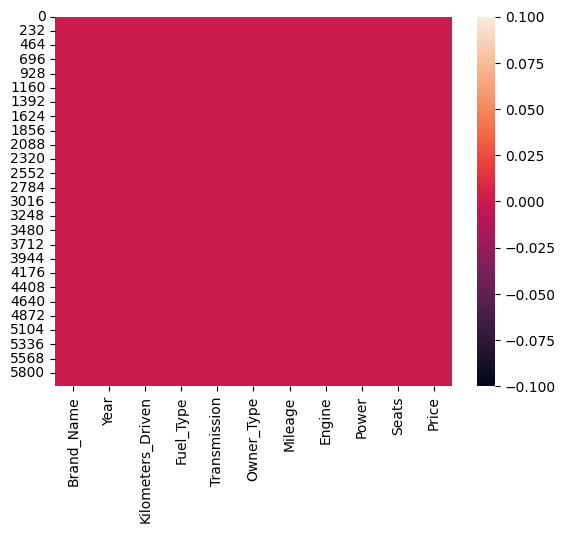

In [138]:
sns.heatmap(df1_map.isnull())
plt.show()

C:\Users\NISHA\AppData\Local\Temp\ipykernel_12920\2235228951.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_map['Price'])


<Axes: xlabel='Price', ylabel='Density'>

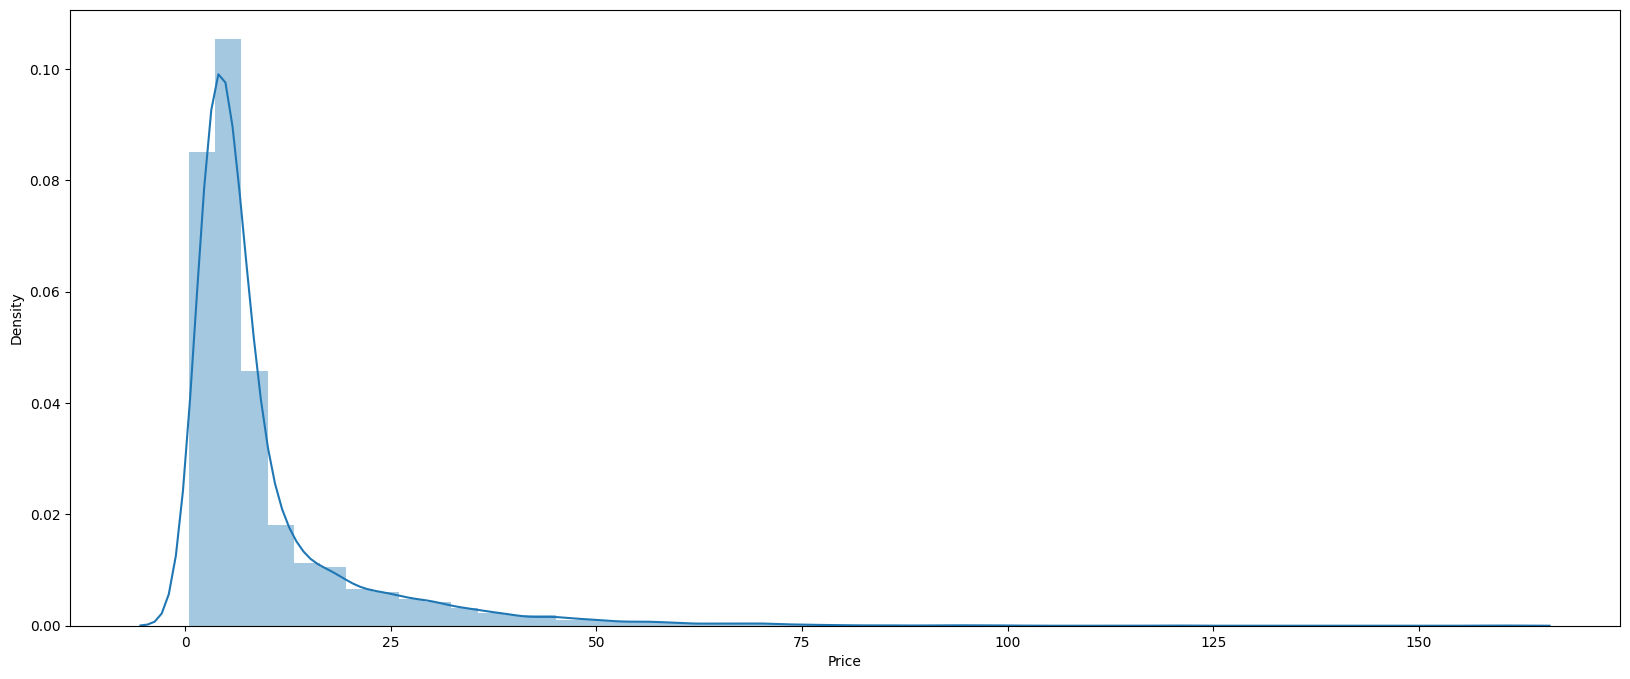

In [139]:
plt.figure(figsize=(20,8))
sns.distplot(df1_map['Price'])

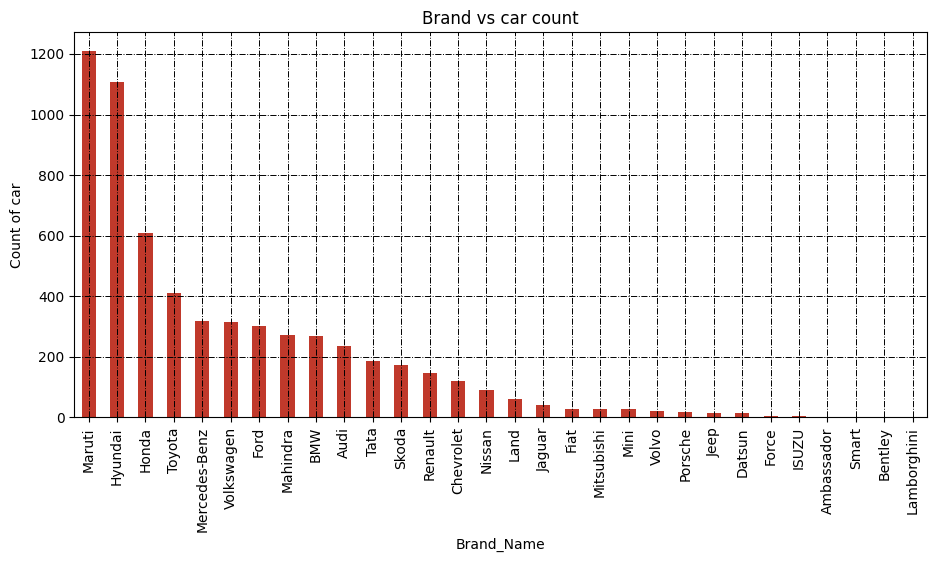

In [140]:
plt.figure(figsize=(11,5))
plt.xlabel("Brand_Name")
plt.ylabel("Count of car")
df1_map['Brand_Name'].value_counts().plot(kind='bar',title='Brand vs car count',color='#C0392B')
plt.grid(color='black', linestyle='-.', linewidth=0.7)


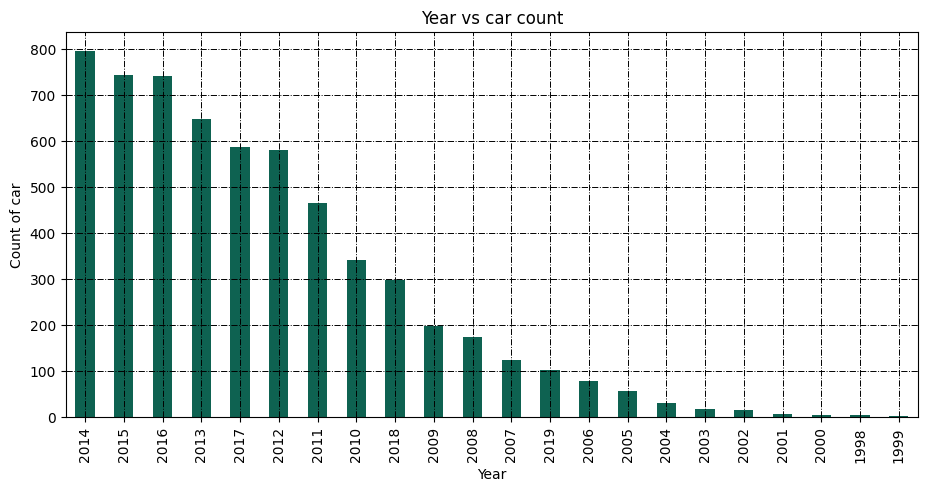

In [141]:

plt.figure(figsize=(11,5))

plt.xlabel("Year")
plt.ylabel("Count of car")

df1_map['Year'].value_counts().plot(kind='bar',title='Year vs car count',color='#0E6251')
plt.grid(color='black', linestyle='-.', linewidth=0.7)


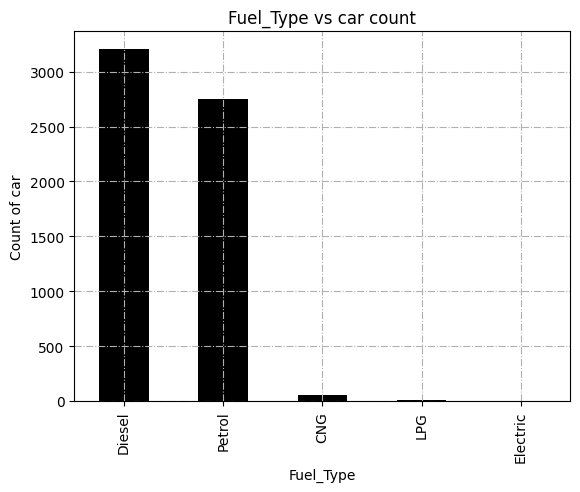

In [142]:
plt.xlabel("Fuel_Type")
plt.ylabel("Count of car")
df1_map['Fuel_Type'].value_counts().plot(kind='bar',title='Fuel_Type vs car count',color='black')

plt.grid(linestyle='-.')


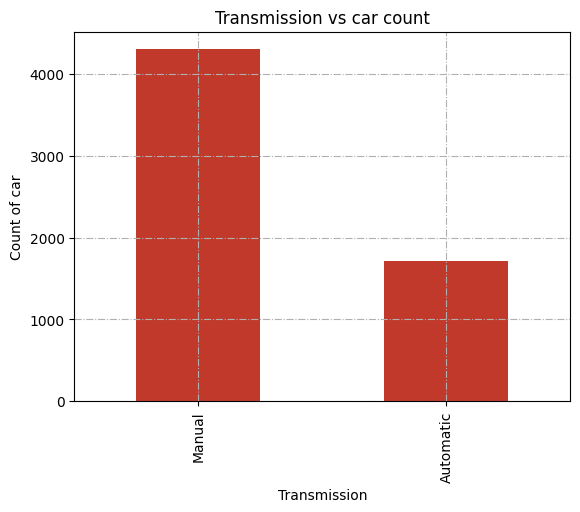

In [143]:
plt.xlabel("Transmission")
plt.ylabel("Count of car")


df1_map['Transmission'].value_counts().plot(kind='bar',title='Transmission vs car count',color='#C0392B')
plt.grid(linestyle='-.')


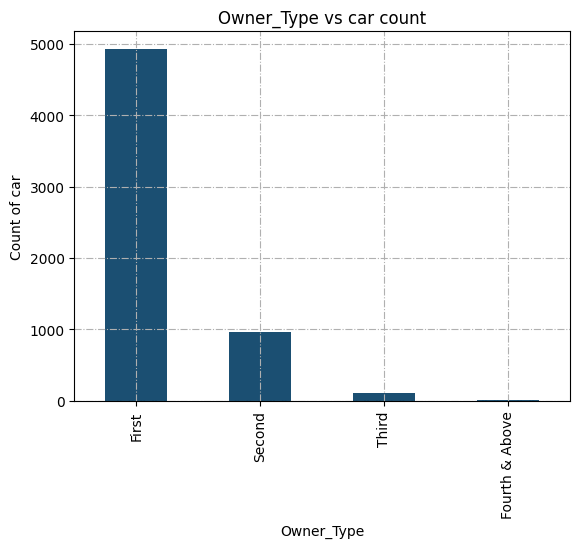

In [144]:
plt.xlabel("Owner_Type")
plt.ylabel("Count of car")
df1_map['Owner_Type'].value_counts().plot(kind='bar',title='Owner_Type vs car count',color='#1B4F72')
plt.grid(linestyle='-.')

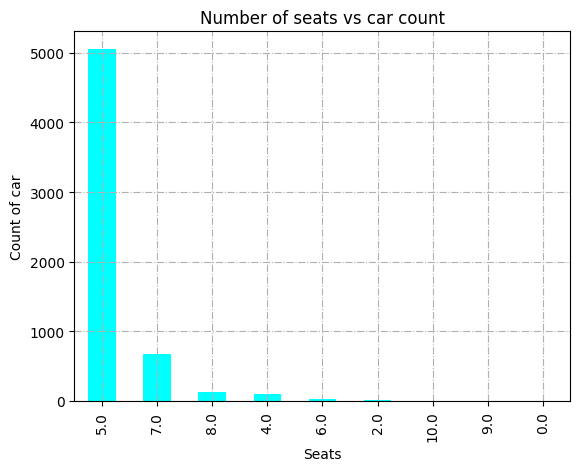

In [145]:
plt.xlabel("No of seats")
plt.ylabel("Count of car")
df1_map['Seats'].value_counts().plot(kind='bar',title='Number of seats vs car count',color='cyan')
plt.grid(linestyle='-.')

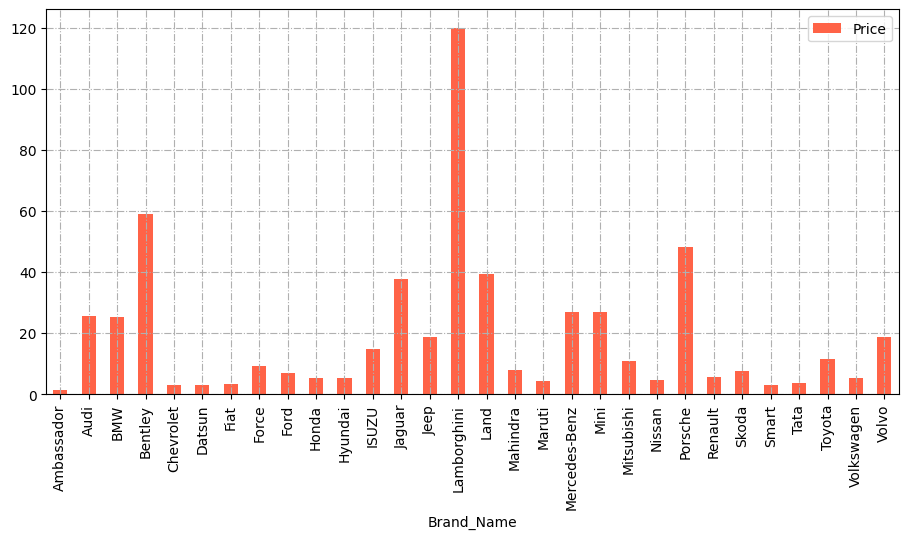

In [146]:
BrandVsPrice= pd.DataFrame(df1_map.groupby('Brand_Name')['Price'].mean())
BrandVsPrice.plot.bar(color='tomato',figsize=(11,5))
plt.grid(linestyle='-.')
plt.show()

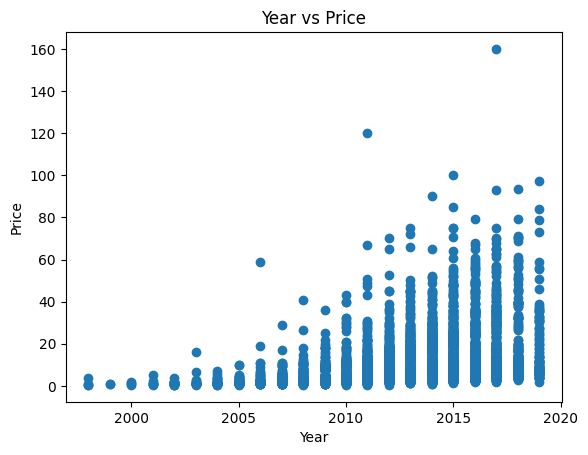

In [147]:
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.scatter(df1_map.Year,df1_map.Price)

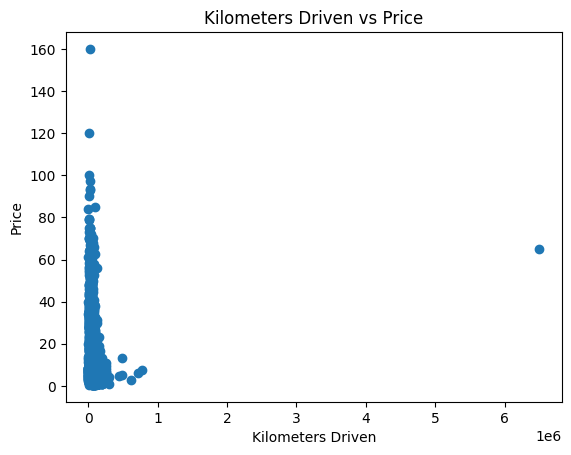

In [148]:
plt.title("Kilometers Driven vs Price")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.scatter(df1_map.Kilometers_Driven,df1_map.Price)

In [149]:
df1_map.drop(df1_map[df1_map['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)


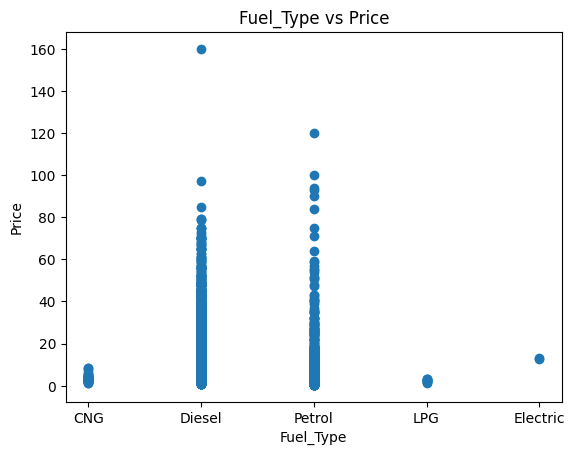

In [150]:
plt.title("Fuel_Type vs Price")
plt.xlabel("Fuel_Type")
plt.ylabel("Price")
plt.scatter(df1_map.Fuel_Type,df1_map.Price)

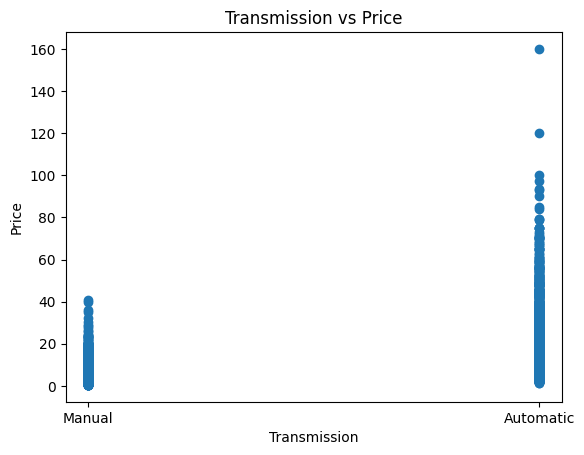

In [151]:
plt.title("Transmission vs Price")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.scatter(df1_map.Transmission,df1_map.Price)

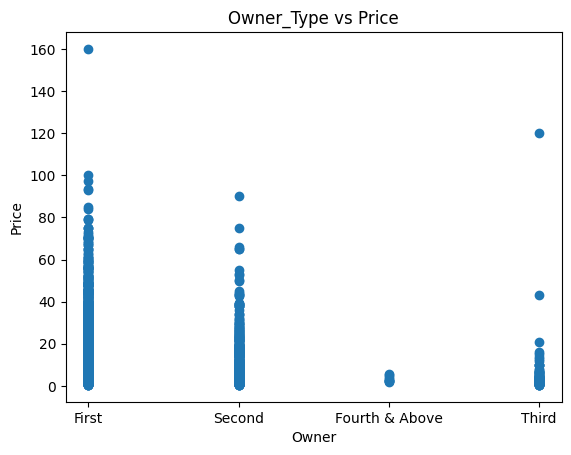

In [152]:
plt.title("Owner_Type vs Price")
plt.xlabel("Owner")
plt.ylabel("Price")
plt.scatter(df1_map.Owner_Type,df1_map.Price)

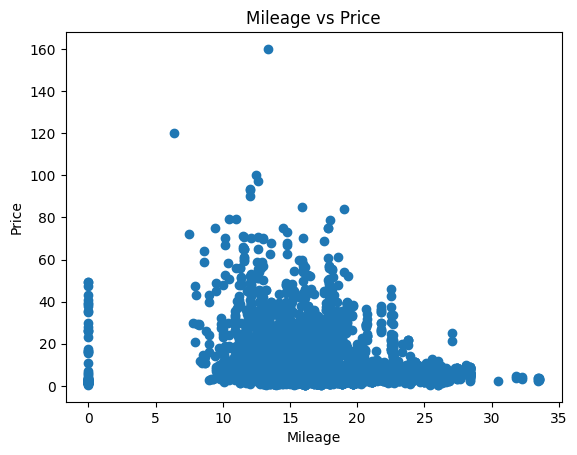

In [153]:
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.scatter(df1_map.Mileage,df1_map.Price)

In [154]:
#df1_map[df1_map['Mileage'] == 0]
df1_map.isin([0]).sum()

Brand_Name            0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              68
Engine                0
Power                 0
Seats                 1
Price                 0
dtype: int64

In [155]:
df1_map["Mileage"].replace({0.0:17.0 },inplace=True)

C:\Users\NISHA\AppData\Local\Temp\ipykernel_12920\2606614054.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1_map["Mileage"].replace({0.0:17.0 },inplace=True)


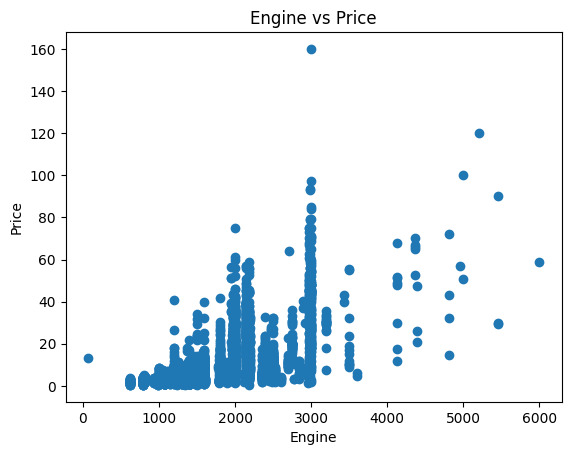

In [156]:
plt.title("Engine vs Price")
plt.xlabel("Engine")
plt.ylabel("Price")
plt.scatter(df1_map.Engine,df1_map.Price)


In [157]:
# df1_map.drop(df1_map[df1_map['Engine'] == 0].index, axis=0, inplace=True) 

In [158]:
# bool_series = pd.isnull(df["Engine"])  
# # filtering data  
# # displaying data only with mileage= NaN  
# df[bool_series]  

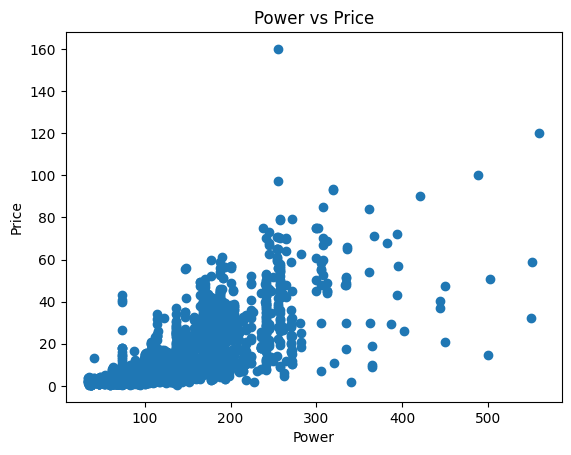

In [159]:
plt.title("Power vs Price")
plt.xlabel("Power")
plt.ylabel("Price")
plt.scatter(df1_map.Power,df1_map.Price)

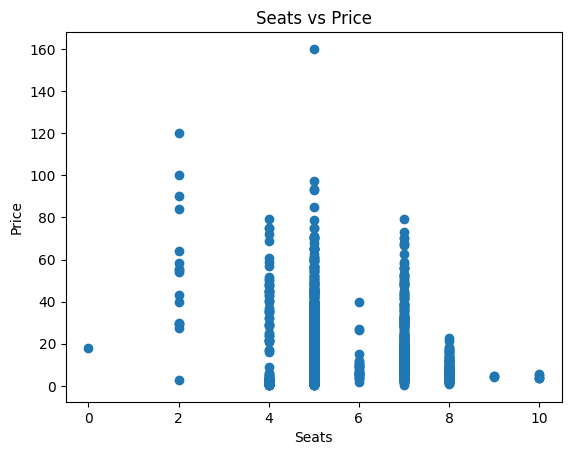

In [160]:
plt.title("Seats vs Price")
plt.xlabel("Seats")
plt.ylabel("Price")
plt.scatter(df1_map.Seats,df1_map.Price)

In [161]:
df1_map.drop(df1_map[df1_map['Seats'] == 0].index, axis=0, inplace=True)


In [162]:
df1_map.isin([0]).sum()

Brand_Name           0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

# Handling catgorical  value

In [163]:
df2_n = df1_map.copy()

In [164]:
from sklearn.preprocessing import LabelEncoder
le_Fuel_Type=LabelEncoder()
le_Transmission=LabelEncoder()
le_Owner_Type=LabelEncoder()
le_Brand_Name=LabelEncoder()

In [165]:
df2_n['Fuel_Type_n'] = le_Fuel_Type.fit_transform(df2_n['Fuel_Type'])
df2_n['Transmission_n'] = le_Transmission.fit_transform(df2_n['Transmission'])
df2_n['Owner_Type_n'] = le_Owner_Type.fit_transform(df2_n['Owner_Type'])
df2_n['Brand_Name_n'] = le_Brand_Name.fit_transform(df2_n['Brand_Name'])

In [166]:
df2_n.head(1)

,Brand_Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_n,Transmission_n,Owner_Type_n,Brand_Name_n
0,Maruti,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,1.75,0,1,0,17


In [167]:
column_values = df2_n[["Brand_Name", "Brand_Name_n"]].values.ravel()
unique_values =  pd.unique(column_values)

print(unique_values)

['Maruti' 17 'Hyundai' 10 'Honda' 9 'Audi' 1 'Nissan' 21 'Toyota' 27
 'Volkswagen' 28 'Tata' 26 'Land' 15 'Mitsubishi' 20 'Renault' 23
 'Mercedes-Benz' 18 'BMW' 2 'Mahindra' 16 'Ford' 8 'Porsche' 22 'Datsun' 5
 'Jaguar' 12 'Volvo' 29 'Chevrolet' 4 'Skoda' 24 'Mini' 19 'Fiat' 6 'Jeep'
 13 'Smart' 25 'Ambassador' 0 'ISUZU' 11 'Force' 7 'Bentley' 3
 'Lamborghini' 14]


In [168]:
df2_n=df2_n.drop(["Fuel_Type","Transmission","Owner_Type","Brand_Name"],axis='columns')
df2_n.head(1)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_n,Transmission_n,Owner_Type_n,Brand_Name_n
0,2010,72000,26.6,998.0,58.16,5.0,1.75,0,1,0,17


In [169]:
df2_n = df2_n[['Brand_Name_n', 'Year', 'Kilometers_Driven', 'Fuel_Type_n', 'Transmission_n','Owner_Type_n','Mileage','Engine','Power','Seats','Price']]

# Correlation Matrix

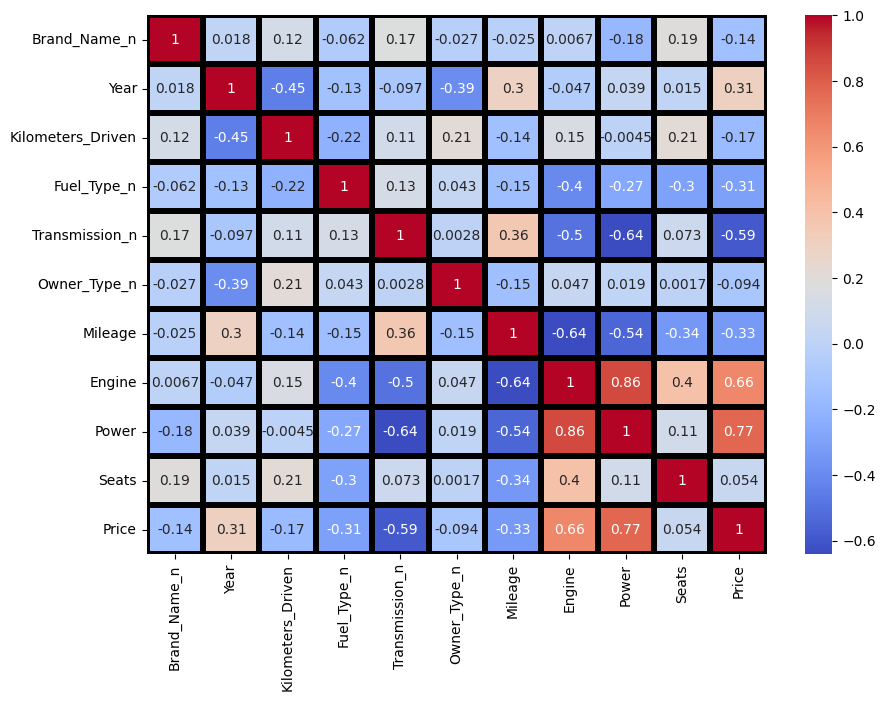

In [170]:

corrMatrix = df2_n.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True,cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

# new df

In [171]:
df3_inputs=df2_n.drop(["Price"],axis='columns')
df3_target=df2_n['Price']

In [172]:
df3_inputs.head(5)

,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats
0,17,2010,72000,0,1,0,26.60,998.0,58.16,5.0
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0
2,9,2011,46000,4,1,0,18.20,1199.0,88.70,5.0
3,17,2012,87000,1,1,0,20.77,1248.0,88.76,7.0
4,1,2013,40670,1,0,2,15.20,1968.0,140.80,5.0


In [173]:
df3_target.head(5)

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

# Feature importance graph

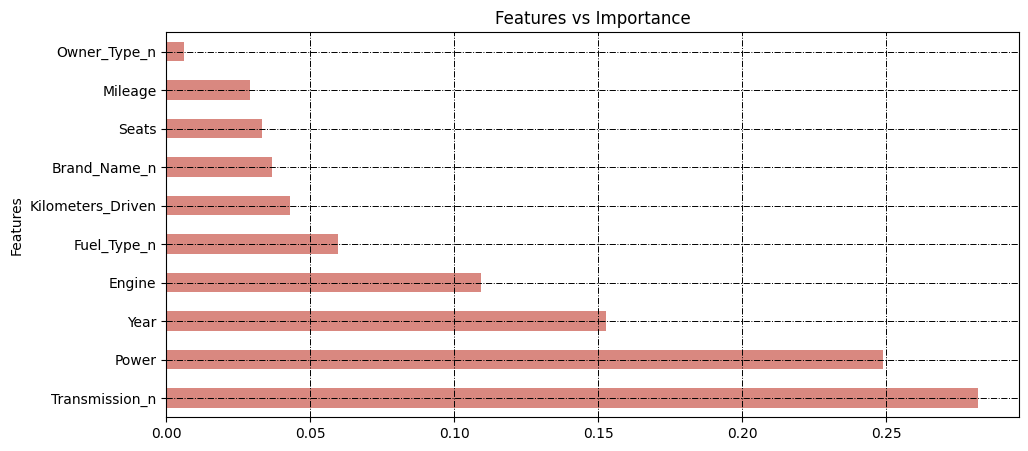

In [174]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(df3_inputs,df3_target)
#print(model.feature_importances_) #use inbuilt class feature_importances of ExtraTreeRegressor
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df3_inputs.columns)
plt.figure(figsize=(11,5))
plt.xlabel("Value")
plt.ylabel("Features")
plt.title("Features vs Importance")
# Draw grid lines with red color and dashed style
plt.grid()

feat_importances.nlargest(10).plot(kind='barh',color='#D98880')##45B39D
plt.grid(color='black', linestyle='-.', linewidth=0.7)
plt.show()

# Splitting data for training and testing

In [175]:
df2_n.shape

(6017, 11)

In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df3_inputs,df3_target,test_size=0.2,random_state=10)

In [177]:
len(X_train)

4813

In [178]:
len(X_test)

1204

# k fold cross validation

In [179]:
from sklearn.model_selection import cross_val_score#importing cross_val_score function

In [180]:
#lr

In [181]:
from sklearn import linear_model
model_linear =linear_model.LinearRegression()

In [182]:
model_linear.fit(X_train,y_train)

LinearRegression()

In [183]:
model_linear.score(X_test,y_test)

0.7140946506387458

In [184]:
sa=cross_val_score(linear_model.LinearRegression(),df3_inputs,df3_target)
avg_score = np.mean(sa)
print('5 splits  =',sa)
print('avg score =',avg_score)


5 splits  = [0.6981989  0.66948381 0.70256438 0.63603759 0.74318193]
avg score = 0.6898933202550732


In [185]:
#lasso

In [186]:
from sklearn.linear_model import Lasso
model_lasso=Lasso()

In [187]:
model_lasso.fit(X_train,y_train)

Lasso()

In [188]:
model_lasso.score(X_test,y_test)

0.6869620576925488

In [189]:
#dt

In [190]:
sa=cross_val_score(Lasso(),df3_inputs,df3_target)
avg_score = np.mean(sa)
print('5 splits  =',sa)
print('avg score =',avg_score)

5 splits  = [0.67421886 0.6581233  0.6824458  0.61323711 0.73390297]
avg score = 0.6723856053794744


In [191]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=42)



In [192]:
model_tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [193]:
model_tree.score(X_test,y_test)

0.6944222907650857

In [194]:
sa=cross_val_score(DecisionTreeRegressor(random_state=42),df3_inputs,df3_target)
avg_score = np.mean(sa)
print('5 splits  =',sa)
print('avg score =',avg_score)

5 splits  = [0.78822708 0.69733892 0.83733044 0.75291472 0.81068279]
avg score = 0.777298790031735


In [195]:
#rf

In [196]:
from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor(random_state=42, n_jobs =-1, max_depth = 30 )


In [197]:
model_forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, n_jobs=-1, random_state=42)

In [198]:
sa=cross_val_score(RandomForestRegressor(random_state=50, n_jobs =-1, max_depth = 30),df3_inputs,df3_target)
avg_score = np.mean(sa)
print('5 splits  =',sa)
print('avg score =',avg_score)

5 splits  = [0.90356396 0.84710102 0.864106   0.84471005 0.86729684]
avg score = 0.865355575700678


# grid search

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


def find_best_model_using_gridsearchcv(df3_inputs,df3_target):
    algos = {
        'linear_regression' : {
            'model': linear_model.LinearRegression(),
            'params': {
                #'normalize': [True, False]
                'copy_X' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'max_features': ['auto', 'sqrt'],
                'n_estimators': [50,60]
                
                 
            }

                
            }
        }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(df3_inputs,df3_target)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

result=find_best_model_using_gridsearchcv(df3_inputs,df3_target)
result

C:\Users\NISHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NISHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NISHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

,model,best_score,best_params
0,linear_regression,0.674731,{'copy_X': True}
1,lasso,0.661941,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.804661,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,Random_forest,0.870321,"{'max_features': 'sqrt', 'n_estimators': 60}"


In [200]:
result_map=result.drop(['best_params'],axis='columns')

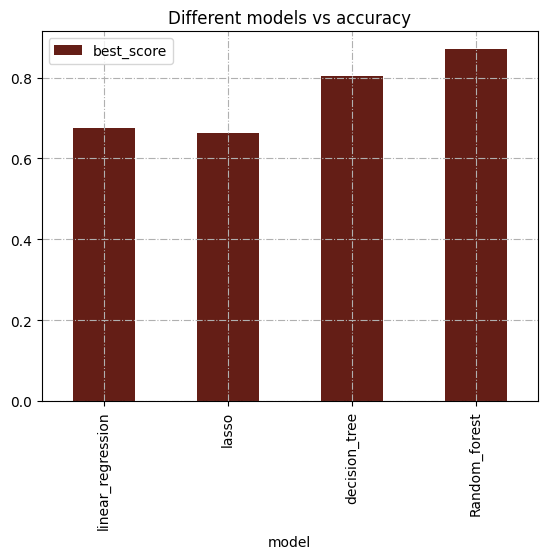

In [201]:
result_map.plot(x="model", y='best_score',kind='bar',color='#641E16',title='Different models vs accuracy')
plt.grid(linestyle='-.')

# Since Random forest gives an accurecy of more than 85% we will use that .

In [202]:
Model_RandomForest = RandomForestRegressor(max_features='sqrt',random_state=60)

In [203]:
Model_RandomForest.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', random_state=60)

In [204]:
Model_RandomForest.score(X_test,y_test)

0.9112900970659111

# ready

In [205]:
#pickle method
import pickle

In [206]:
#wrinting the model in a file
pickle.dump(Model_RandomForest,open('rmodel.pkl','wb')) 

In [207]:
#reading the file
rmodel=pickle.load(open('rmodel.pkl','rb'))

In [208]:
rmodel.predict([[17,2010,100000,15,1000,40,5.0,3,1,0]])

C:\Users\NISHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8.0148])